# 自定义函数默认参数
必需指向不变对象（None,str），因为Python函数在定义的时候，默认参数L的值就被计算出来了，如果改变了L的内容，则下次调用时，默认参数的内容就变了

In [1]:
def add_end(L=None):
    if L is None:
        L = []
    L.append('END')
    return L

# 工厂函数：能记住嵌套作用域变量值的函数

In [2]:
def maker(N):
    def action(X):
        return X**N
    return action

In [3]:
maker(2)(3)

9

# 匿名函数捕获变量值

In [8]:
x = 10
a = lambda y, x=x: x + y
x = 20
b = lambda y, x=x: x + y

In [9]:
a(10)

20

In [10]:
b(10)

30

嵌套作用域中的变量在嵌套函数中调用时才查找，所以变量实际上记住的是同样的值（最后一次循环迭代中循环变量的值）

In [6]:
def makeactions():
    act=[]
    for i in range(5):                      #限定赋值的范围
        act.append(lambda x,i=i:i**x)
    return act

In [9]:
makeactions()[2](3)

8

# 命名空间
局部的命名空间去 -> 全局命名空间 -> 内置命名空间
> 内置名称（built-in names）：Python 语言内置的名称，比如函数名 abs、char 和异常名称 BaseException、Exception 等等

> 全局名称（global names）：模块中定义的名称，记录了模块的变量，包括函数、类、其它导入的模块、模块级的变量和常量

> 局部名称（local names）：函数中定义的名称，记录了函数的变量，包括函数的参数和局部定义的变量

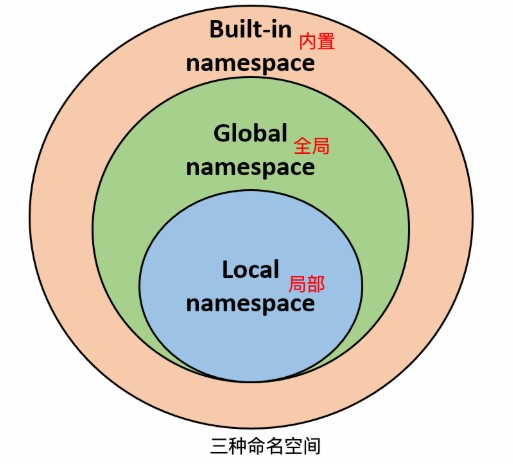

In [2]:
from IPython.display import Image
Image(filename='C:/Users/86188/Desktop/命名空间.jpg',width=400,height=300)

# 作用域
在默认的情况下，一个函数的所有变量名都是与函数的命名空间相关联

LEGB原则：local-enclosing-global-built-in
> L（Local）：最内层，包含局部变量，比如一个函数/方法内部。

> E（Enclosing）：包含了非局部(non-local)也非全局(non-global)的变量
>> 比如两个嵌套函数，一个函数（或类） A 里面又包含了一个函数 B ，那么对于 B 中的名称来说 A 中的作用域就为 nonlocal。

> G（Global）：当前脚本的最外层，比如当前模块的全局变量。

> B（Built-in）：包含了内建的变量/关键字等

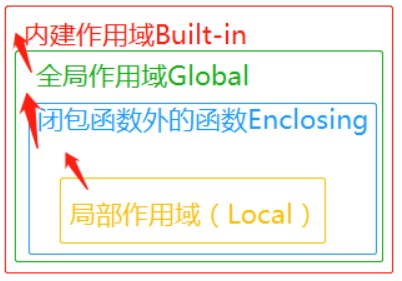

In [3]:
from IPython.display import Image
Image(filename='C:/Users/86188/Desktop/LEGB.jpg',width=400,height=300)

# 参数类型
POSITIONAL_OR_KEYWORD：一般参数
> 没有任何*的说明，此参数可以通过位置传参调用，也可以通过关键字传参

<font color="red">VAR_POSITIONAL：可变的位置参数</font>
> 通过*前缀来声明，参数以一个元祖(tuple)显示，只允许存在一个

KEYWORD_ONLY：关键字参数
> 只会在VAR_POSITIONAL类型参数的后面而且不带**前缀，只能用关键字KEYWORD来传参，不可以用位置传参（因为位置传的参数全让前面的VAR_POSITIONAL类型参数接收完了）

<font color="red">VAR_KEYWORD：可变的关键字参数</font>
> 通过**前缀来声明，在函数内部以一个字典(dict)显示，只允许存在一个

POSITIONAL_OR_KEYWORD和KEYWORD_ONLY可以自定义默认参数，而VAR_POSITIONAL和VAR_KEYWORD不允许自定义默认参数的

In [1]:
def avg(first, *rest):
    return (first + sum(rest)) / (1 + len(rest))

avg(1, 2, 3, 4)

2.5

In [2]:
import html

def make_element(name, value, **attrs):
    keyvals = [' %s="%s"' % item for item in attrs.items()]
    attr_str = ''.join(keyvals)
    element = '<{name}{attrs}>{value}</{name}>'.format(
                name=name,
                attrs=attr_str,
                value=html.escape(value))
    print(element)

make_element('item', 'Albatross', size='large', quantity=6)

<item size="large" quantity="6">Albatross</item>


## 强制关键字参数
将强制关键字参数放到某个\*参数或者单个\*后面

In [3]:
def minimum(*values, clip=None):
    m = min(values)
    if clip is not None:
        m = clip if clip > m else m
    return m

In [4]:
minimum(1, 5, 2, -5, 10) # Returns -5

-5

In [5]:
minimum(1, 5, 2, -5, 10, clip=0) # Returns 0

0

## 给函数参数增加元信息（注解）

In [6]:
def add(x:int, y:int) -> int:
    return x + y

# 递归函数
递归的原理：n=1成立；假设n-1成立，n成立 

## 处理任意结构——嵌套
计算一个嵌套子列表结构中所有数字总和

In [15]:
from collections import Iterable

def flatten(L, ignore_types=(str, bytes)):
    for x in L:
        if isinstance(x,Iterable) and not isinstance(x,ignore_types):
            yield from flatten(x)
        else:
            yield x

In [17]:
a=[1,2,[3,4,[5,6],7],8]
sum(flatten(a))

36

其它方法
> 利用json
>> json.loads('['+str(a).replace('[','').replace(']','')+']')

> numpy.ravel()

In [25]:
#复制列表结构
A=[1,[2,3,[2,3]],[4,5,6],7]
B=[2,3,4,5,6,7,8,2,3]
iB=iter(B)
def copy(pattern):
    return [copy(a) if isinstance(a,list) else next(iB) for a in pattern]
copy(A)

[2, [3, 4, [5, 6]], [7, 8, 2], 3]

## 注意防止栈溢出
函数调用是通过栈（stack）这种数据结构实现的，每当进入一个函数调用，栈就会加一层栈帧，每当函数返回，栈就会减一层栈帧。由于栈的大小不是无限的，所以，递归调用的次数过多，会导致栈溢出。

解决递归调用栈溢出的方法是通过尾递归优化，事实上尾递归和循环的效果是一样的，所以，把循环看成是一种特殊的尾递归函数也是可以的。尾递归是指，在函数返回的时候，调用自身本身，并且，return语句不能包含表达式。这样，编译器或者解释器就可以把尾递归做优化，使递归本身无论调用多少次，都只占用一个栈帧，不会出现栈溢出的情况。

In [18]:
def fact(n):
    return fact_iter(n, 1)

def fact_iter(num, product):
    if num == 1:
        return product
    return fact_iter(num - 1, num * product)

# 常用函数
> lambda：函数速写

> map(func, *iterables)：将传入的函数依次作用到序列的每个元素，并把结果作为新的Iterator返回

> filter: 把传入的函数依次作用于每个元素，然后根据返回值是True还是False决定保留还是丢弃该元素

> reduce：每队元素都应用函数并运行到最后结果

> enumerate: 用于遍历序列中的元素以及它们的下标

> sorted：排序算法，可以接收一个key函数来实现自定义的排序

> any和all：用于判断列表中元素特征

In [19]:
L=[lambda x: x**2,lambda x:x**3,lambda x:x**4]
L[0](3)

9

In [20]:
list(map((lambda x:x+3),[1,2,3,4]))

[4, 5, 6, 7]

In [21]:
list(filter((lambda x:x>0),range(-5,5)))

[1, 2, 3, 4]

In [22]:
from functools import reduce
reduce((lambda x,y: x+y),[1,2,3,4])

10

In [23]:
L=['a','b','c','d']
for i,j in enumerate(L,2):
    print(i,j)

2 a
3 b
4 c
5 d


In [24]:
sorted(['bob', 'about', 'Zoo', 'Credit'], key=str.lower, reverse=True)

['Zoo', 'Credit', 'bob', 'about']

# 减少可调用对象的参数个数
functools.partial

In [12]:
from functools import partial

def spam(a, b, c, d):
    print(a, b, c, d)
    
s1 = partial(spam, 1) # a = 1

In [13]:
s1(2, 3, 4)

1 2 3 4


In [14]:
s1(4, 5, 6)

1 4 5 6


# 访问闭包中定义的变量
通过编写访问函数并将其作为函数属性绑定到闭包上来实现这个目的

In [1]:
def sample():
    n = 0
    # Closure function
    def func():
        print('n=', n)

    # Accessor methods for n
    def get_n():
        return n

    def set_n(value):
        nonlocal n
        n = value

    # Attach as function attributes
    func.get_n = get_n
    func.set_n = set_n
    return func

In [2]:
f = sample()
f()

n= 0


In [3]:
f.set_n(10)

In [4]:
f()

n= 10


In [5]:
f.get_n()

10

# 内置函数

## vars() 函数
返回对象object的属性和属性值的字典对象

In [1]:
vars()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['', 'vars()'],
 '_oh': {},
 '_dh': ['C:\\Users\\86188\\PythonPackages\\基础语法'],
 'In': ['', 'vars()'],
 'Out': {},
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x0000027420FF2358>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x2742100db70>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x2742100db70>,
 '_': '',
 '__': '',
 '___': '',
 'json': <module 'json' from 'c:\\users\\86188\\appdata\\local\\programs\\python\\python36\\lib\\json\\__init__.py'>,
 'yapf_reformat': <function __main__.yapf_reformat(cell_text)>,
 '_i': '',
 '_ii': '',
 '_iii': '',
 '_i1': 'vars()'}

In [2]:
class Runoob:
    a = 1

In [3]:
vars(Runoob)

mappingproxy({'__module__': '__main__',
              'a': 1,
              '__dict__': <attribute '__dict__' of 'Runoob' objects>,
              '__weakref__': <attribute '__weakref__' of 'Runoob' objects>,
              '__doc__': None})